# アンサンブル学習でBitcoinの価格を予測する
## 〜とりあえず実装してみた編〜

# 前回
## 独立の情報源からBitcoinの価格を推定するプログラムを大量に作れば、文殊の知恵効果でハチャメチャな精度が出るのでは！？
![](./img/idea.png)

# とりあえずBTCのデータを見る

bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv

[Bitcoin Historical Data | Kaggle](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

In [1]:
import pandas as pd
df = pd.read_csv("./data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
from datetime import datetime
df["Timestamp_UTC"] = df["Timestamp"].apply(lambda x: datetime.utcfromtimestamp(x))
df = df.set_index("Timestamp_UTC")

In [3]:
df = df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume_(BTC)": "volume"
})

In [4]:
import cufflinks as cf
cf.set_config_file(offline=True)
red = cf.get_scales("dflt")[4]
green = cf.get_scales("dflt")[2]

In [5]:
# BTC_USDローソクチャート分足
qf = cf.QuantFig(df.tail(100)) # 表示に時間がかかるので最後100分だけ表示
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_分足")

In [6]:
# １分毎は多すぎるので１日毎にする
how = {
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
}
df_day = df.resample('D').agg(how)
df_day

,open,high,low,close,volume
Timestamp_UTC,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878
2012-01-01,4.58,5.00,4.58,5.00,21.602000
2012-01-02,5.00,5.00,5.00,5.00,19.048000
2012-01-03,5.32,5.32,5.14,5.29,88.037281
2012-01-04,4.93,5.57,4.93,5.57,107.233260
2012-01-05,5.72,6.65,5.72,6.65,94.801829
2012-01-06,6.65,6.90,6.00,6.00,33.882747
2012-01-07,6.80,6.80,6.80,6.80,0.295858
2012-01-08,6.90,7.00,6.90,7.00,5.000000


In [7]:
# BTC_USDローソクチャート日足
qf = cf.QuantFig(df_day)
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="BTC_USD_日足")

# BTCの価格に関係ありそうな要素
## １．日経平均株価

[Nikkei 225 (^N225) Stock Historical Prices & Data](https://finance.yahoo.com/quote/%5EN225/history?ltr=1)

In [8]:
n255 = pd.read_csv("./data/N225.csv")
n255["Timestamp_UTC"] = n255["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
n255 = n255.set_index("Timestamp_UTC").drop(columns=["Date", "Adj Close"])
n255 = n255.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"
})
n255

,open,high,low,close,volume
Timestamp_UTC,,,,,
2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,106000.0
2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,77700.0
2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,101300.0
2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,112300.0
2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,106200.0
2012-01-12,8423.099609,8426.830078,8360.330078,8385.589844,84800.0
2012-01-13,8471.099609,8509.759766,8458.679688,8500.019531,109800.0
2012-01-16,8409.790039,8409.790039,8352.230469,8378.360352,76500.0
2012-01-17,8420.120117,8475.660156,8413.219727,8466.400391,85500.0


In [9]:
# 日経平均株価ローソクチャート
qf = cf.QuantFig(n255)
qf.add_volume()
qf.iplot(up_color=green, down_color=red, name="日経平均株価_日足")

In [10]:
# BTCデータと日経平均データの形を同じにする
n255_btc = pd.merge(n255, df_day, on="Timestamp_UTC", how="inner", suffixes=("_n255", "_btc"))
n255_btc = n255_btc.dropna()
n255_btc

,open_n255,high_n255,low_n255,close_n255,volume_n255,open_btc,high_btc,low_btc,close_btc,volume_btc
Timestamp_UTC,,,,,,,,,,
2012-01-04,8549.540039,8581.450195,8547.700195,8560.110352,106000.0,4.93,5.57,4.93,5.57,107.233260
2012-01-05,8515.660156,8519.160156,8481.830078,8488.709961,77700.0,5.72,6.65,5.72,6.65,94.801829
2012-01-06,8488.980469,8488.980469,8349.330078,8390.349609,101300.0,6.65,6.90,6.00,6.00,33.882747
2012-01-10,8422.990234,8450.589844,8405.179688,8422.259766,112300.0,6.24,7.14,6.24,7.14,62.289980
2012-01-11,8440.959961,8463.719727,8426.030273,8447.879883,106200.0,7.14,7.33,6.25,7.00,105.358934
2012-01-12,8423.099609,8426.830078,8360.330078,8385.589844,84800.0,6.95,7.38,6.51,6.51,82.301632
2012-01-13,8471.099609,8509.759766,8458.679688,8500.019531,109800.0,6.80,7.36,6.60,6.60,48.970145
2012-01-16,8409.790039,8409.790039,8352.230469,8378.360352,76500.0,6.20,7.10,6.20,7.10,12.649296
2012-01-17,8420.120117,8475.660156,8413.219727,8466.400391,85500.0,6.50,6.90,6.00,6.00,80.514008


In [11]:
# BTC_USDと日経平均株価を重ねてみる
pd.DataFrame({
    "BTC_USD": n255_btc["close_btc"],
    "n255": n255_btc["close_n255"],
}).iplot()

In [12]:
# BTC_USDと日経平均株価の相関
import matplotlib.pyplot as plt
X = n255_btc["close_n255"].to_frame()
Y = n255_btc["close_btc"].to_frame()
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.grid()

# 線形回帰する

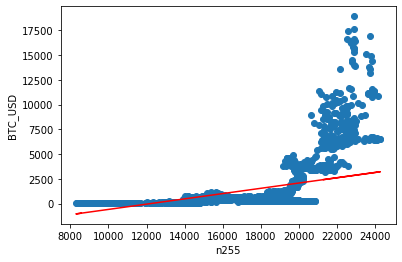

In [13]:
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-4 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
plt.scatter(X, Y)
plt.xlabel("n255")
plt.ylabel("BTC_USD")
plt.plot(X, model.predict(X), color="red")

In [14]:
# 実際のBTC_USDと予測結果（2018-01-4から2019-03-13まで）
pd.DataFrame({
    "actual": test_y["close_btc"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
}).iplot()

# 結果が芳しくないので、対数差分（≒変化率）を回帰してみる

In [15]:
import numpy as np
difflog_n255_btc = np.log1p(n255_btc) - np.log1p(n255_btc.shift())
difflog_n255_btc = difflog_n255_btc.dropna()
difflog_n255_btc

,open_n255,high_n255,low_n255,close_n255,volume_n255,open_btc,high_btc,low_btc,close_btc,volume_btc
Timestamp_UTC,,,,,,,,,,
2012-01-05,-0.003970,-0.007284,-0.007735,-0.008375,-0.310580,0.125064,0.152192,0.125064,0.152192,-0.122007
2012-01-06,-0.003138,-0.003548,-0.015743,-0.011653,0.265228,0.129617,0.032157,0.040822,-0.088795,-1.010289
2012-01-10,-0.007803,-0.004532,0.006666,0.003796,0.103086,-0.055084,0.029927,0.033711,0.150880,0.595735
2012-01-11,0.002131,0.001552,0.002477,0.003037,-0.055849,0.117169,0.023073,0.001380,-0.017349,0.519093
2012-01-12,-0.002118,-0.004368,-0.007827,-0.007400,-0.225026,-0.023618,0.005984,0.035234,-0.063206,-0.244351
2012-01-13,0.005682,0.009792,0.011694,0.013552,0.258362,-0.019048,-0.002389,0.011913,0.011913,-0.511042
2012-01-16,-0.007263,-0.011816,-0.012663,-0.014415,-0.361366,-0.080043,-0.031594,-0.054067,0.063716,-1.297738
2012-01-17,0.001227,0.007801,0.007275,0.010452,0.111224,0.040822,-0.025001,-0.028171,-0.145954,1.787087
2012-01-18,0.004522,0.014071,0.003899,0.009893,0.465604,-0.070422,0.025001,-0.001430,0.145954,0.500393


In [16]:
# BTC_USDの変化率と日経平均株価の変化率を重ねる
pd.DataFrame({
    "difflog_BTC_USD": difflog_n255_btc["close_btc"],
    "difflog_n255": difflog_n255_btc["close_n255"],
}).iplot()

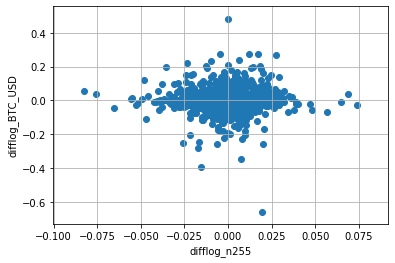

In [17]:
# BTC_USDの変化率と日経平均株価の変化率の相関
import matplotlib.pyplot as plt
X = difflog_n255_btc["close_n255"].to_frame()
Y = difflog_n255_btc["close_btc"].to_frame()
plt.scatter(X, Y)
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.grid()

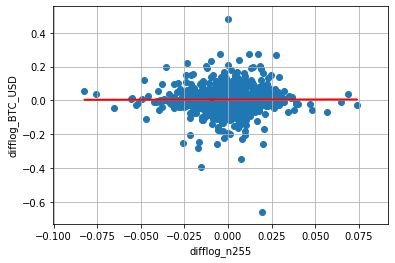

In [18]:
# 一応回帰する
from sklearn.linear_model import LinearRegression

# 2012-01-04 <= train < 2018-01-4 <= test <= 2019-03-13
split_time = datetime.strptime("2018-01-4", "%Y-%m-%d")
train_x, train_y = X[X.index < split_time] ,Y[Y.index < split_time] 
test_x,  test_y = X[split_time <= X.index] ,Y[split_time <= Y.index] 

model = LinearRegression()
model.fit(train_x, train_y)
plt.scatter(X, Y)
plt.xlabel("difflog_n255")
plt.ylabel("difflog_BTC_USD")
plt.plot(X, model.predict(X), color="red")
plt.grid()

In [19]:
# 実際のBTC_USDの変化率と予測結果（2018-01-4から2019-03-13まで）
pd.DataFrame({
    "actual": test_y["close_btc"],
    "predicted": model.predict(test_x).reshape(1, -1)[0]
}).iplot()

# 気になって調べたこと

- 時系列データの線形補完のやりかた
    - 今回は嘘のデータを混ぜたくないので使わない
    - [pandasで欠損値NaNを前後の値から補間するinterpolate | note.nkmk.me](https://note.nkmk.me/python-pandas-interpolate/)

```python
df.interpolate('time')
```

- OHLCデータは`cufflinks`ってやつ使うと簡単に描写できる
    - Open、High、Low、Closeのあるデータ、主に金融データ
    - [jupyter notebook上で金融データの描画・取得・操作 - Qiita](https://qiita.com/u1and0/items/6bc0dbeed0e20dd89eda)

- OHLCデータのタイムスタンプ単位は`resample`使うと簡単に変更できる

``` python
df.resample('H').agg(how)
```